In [47]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import pydot
import warnings 
warnings.filterwarnings('ignore') 
  
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

In [49]:
path = 'Cats and Dogs image classification'
classes = os.listdir(path) 
classes 

['test', 'train']

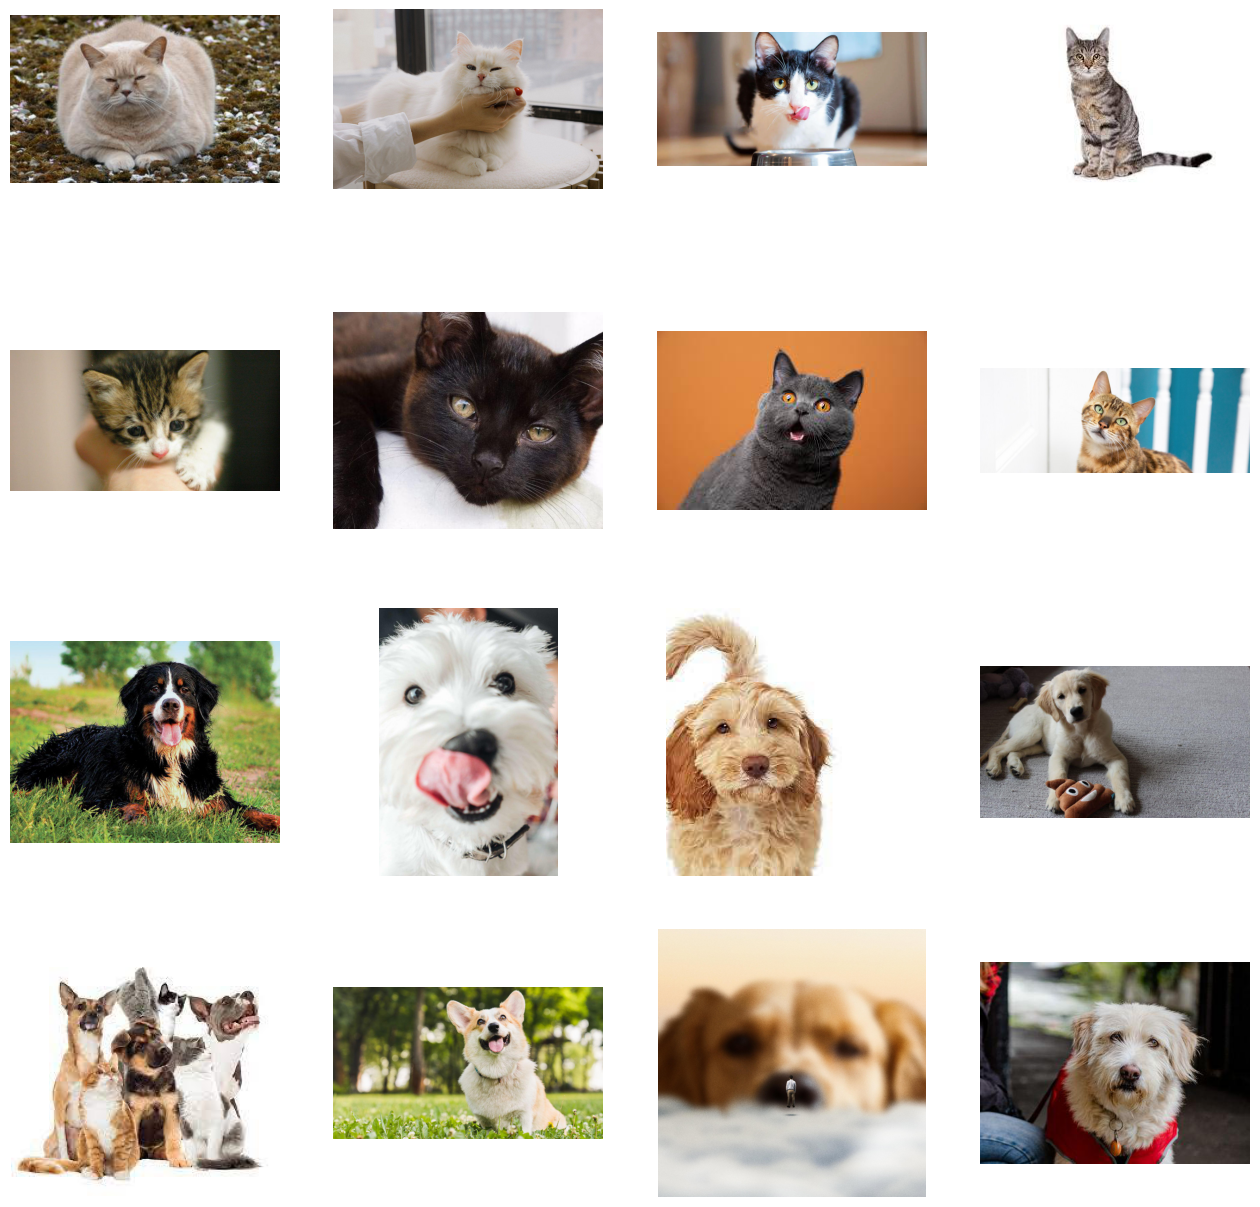

In [51]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

train_dir = 'Cats and Dogs image classification/train'
test_dir = 'Cats and Dogs image classification/test'

cat_train_dir = os.path.join(train_dir, 'cats')
cat_test_dir = os.path.join(test_dir, 'cats')
dog_train_dir = os.path.join(train_dir, 'dogs')
dog_test_dir = os.path.join(test_dir, 'dogs')

cat_train_names = os.listdir(cat_train_dir)
cat_test_names = os.listdir(cat_test_dir)
dog_train_names = os.listdir(dog_train_dir)
dog_test_names = os.listdir(dog_test_dir)

pic_index = 210

cat_train_images = [os.path.join(cat_train_dir, fname) 
                    for fname in cat_train_names[pic_index-8:pic_index]]
cat_test_images = [os.path.join(cat_test_dir, fname) 
                   for fname in cat_test_names[pic_index-8:pic_index]]
dog_train_images = [os.path.join(dog_train_dir, fname) 
                    for fname in dog_train_names[pic_index-8:pic_index]]
dog_test_images = [os.path.join(dog_test_dir, fname) 
                   for fname in dog_test_names[pic_index-8:pic_index]]

images = cat_train_images + cat_test_images + dog_train_images + dog_test_images

for i, img_path in enumerate(images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [52]:
base_dir = 'Cats and Dogs image classification'
  
train_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='training', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='validation', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32)

Found 697 files belonging to 2 classes.
Using 628 files for training.
Found 697 files belonging to 2 classes.
Using 69 files for validation.


In [53]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

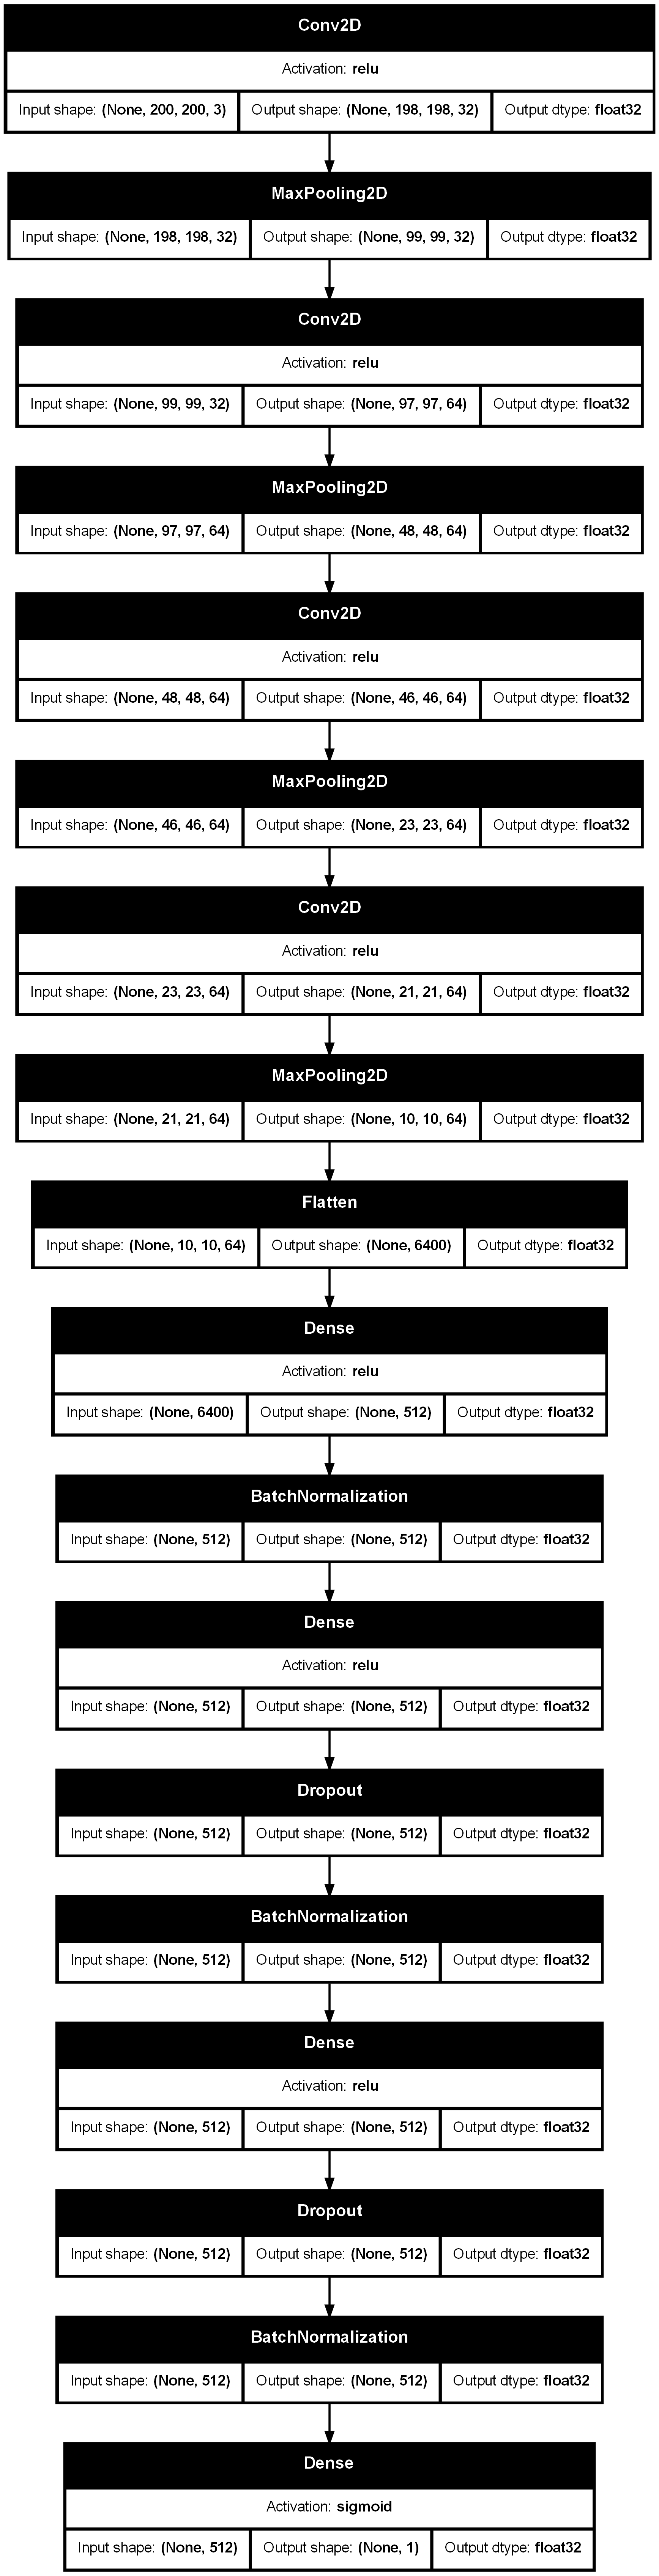

In [59]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 

In [61]:
model.compile( 
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
) 

In [63]:
history = model.fit(train_datagen, 
          epochs=10, 
          validation_data=test_datagen) 

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.5214 - loss: 0.9698 - val_accuracy: 0.8116 - val_loss: 2.1389
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.6280 - loss: 0.7211 - val_accuracy: 0.8116 - val_loss: 1.9639
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.7208 - loss: 0.5795 - val_accuracy: 0.8116 - val_loss: 1.4007
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.7297 - loss: 0.5559 - val_accuracy: 0.6377 - val_loss: 0.6437
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.7790 - loss: 0.4992 - val_accuracy: 0.8116 - val_loss: 0.5521
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.8067 - loss: 0.4359 - val_accuracy: 0.7101 - val_loss: 0.6489
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.8259 - loss: 0.4151 - val_accuracy: 0.8116 - val_loss: 0.7074
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.8184 - loss: 0.4443 - val_accuracy: 0.

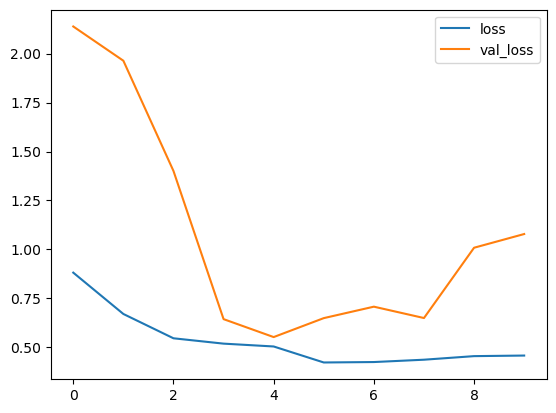

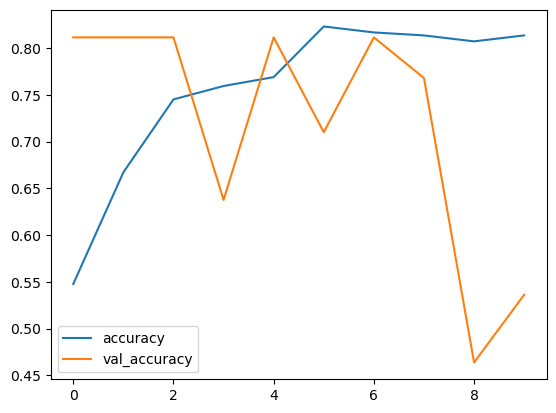

In [65]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dog


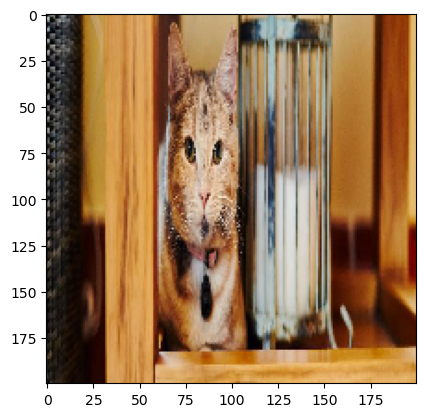

In [93]:
from keras.preprocessing import image 
  
test_image = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\cats\cat_88.jpg',target_size=(200,200)) 
  
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
result = model.predict(test_image)
if(np.argmax(result) == 0):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dog


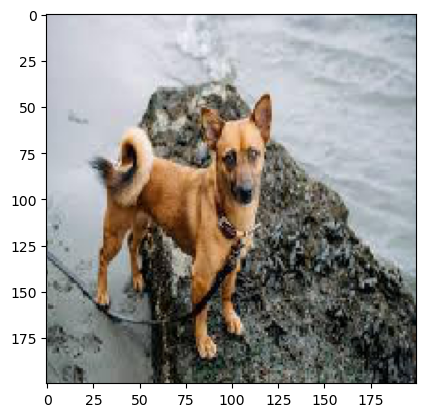

In [89]:
test_image = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\dogs\dog_75.jpg', target_size=(200, 200)) 
  
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 
  
result = model.predict(test_image) 

result = model.predict(test_image)
if(np.argmax(result) == 0):
  print("Dog")
else:
  print("Cat")